Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <</insert link>>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# %matplotlib inline

In [5]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [6]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

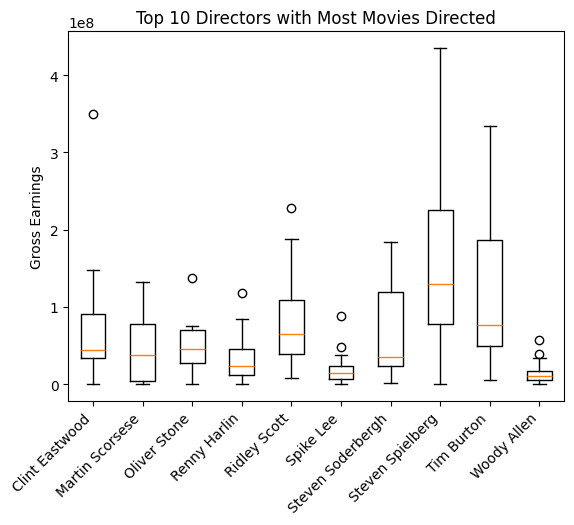

In [33]:
# Filter data [Remove directors that are named '0']
filtered_directors = data[data['director_name'] != '0']

# Group by director and get the top 10 directors with most movies directed
top_directors = filtered_directors.groupby('director_name').size().sort_values(ascending=False).head(10)

# Filter the original dataframe to include only these top directors
top_directors_data = data[data['director_name'].isin(top_directors.index)]

# Group the data by director and get the gross earnings for each of their movie
gross_earnings_by_director = top_directors_data.groupby('director_name')['gross'].apply(list)

# Create a boxplot for the top directors' gross earnings
plt.boxplot(gross_earnings_by_director, tick_labels=gross_earnings_by_director.index)

plt.title('Top 10 Directors with Most Movies Directed')
plt.ylabel('Gross Earnings')
plt.xticks(rotation=45, ha="right")
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

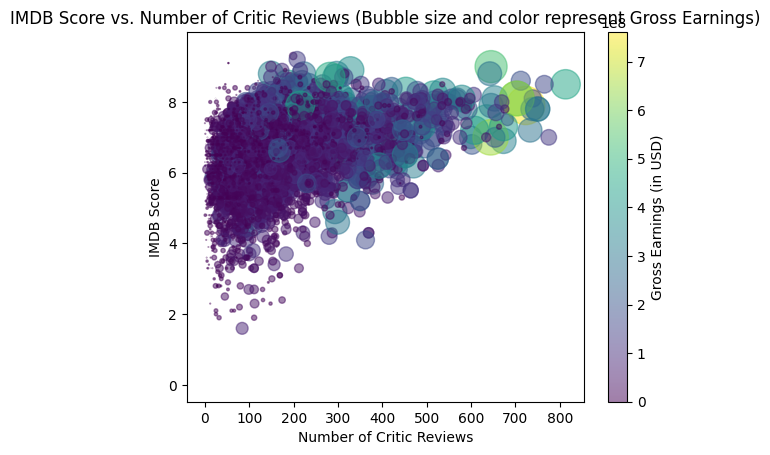

In [79]:
# Create a scatter plot
plt.scatter(data['num_critic_for_reviews'], data['imdb_score'], s=data['gross']/1e6, alpha=0.5, c=data['gross'])

plt.title('IMDB Score vs. Number of Critic Reviews (Bubble size and color represent Gross Earnings)')
plt.xlabel('Number of Critic Reviews')
plt.ylabel('IMDB Score')
plt.colorbar(label='Gross Earnings (in USD)')
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [43]:
data['computed_sales'] = data['gross'] - data['budget']
data.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,computed_sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0


## Which directors garnered the most total sales?

In [56]:
# filtered_directors is a data frame used above
# Get the total sales using aggregation
director_agg = filtered_directors.groupby('director_name').agg(
    total_sales = ('gross', 'sum')
)
# Sort and print the directors with most total sales
director_agg.sort_values(by='total_sales', ascending=False).head()

,total_sales
director_name,
Steven Spielberg,4.114233e+09
Peter Jackson,2.592969e+09
Michael Bay,2.231243e+09
Tim Burton,2.071275e+09
Sam Raimi,2.049549e+09


## Plot sales and average likes as a scatterplot. Fit it with a line.

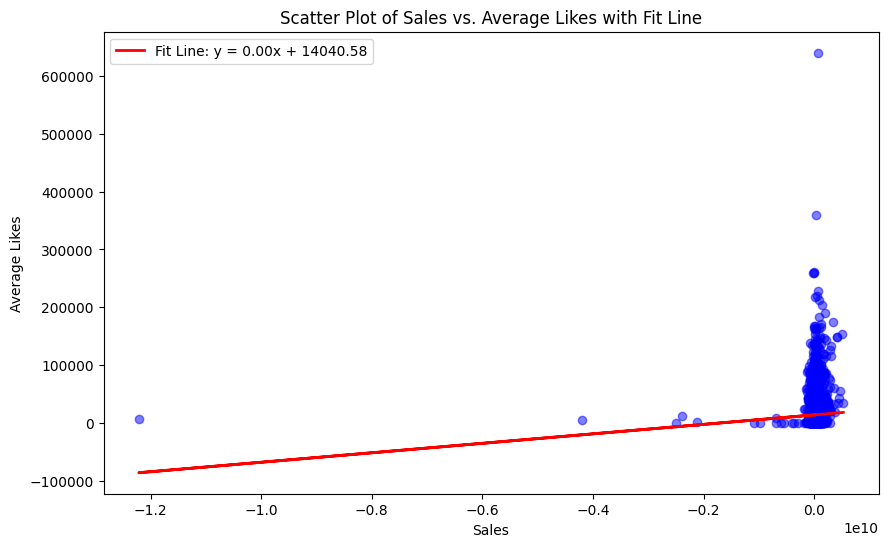

In [72]:
# Add average_likes as a new column
data['ave_likes'] = data['movie_facebook_likes'] + data['actor_1_facebook_likes'] 
+ data['actor_2_facebook_likes'] + data['actor_3_facebook_likes'] 
+ data['director_facebook_likes'] + data['cast_total_facebook_likes']

plt.figure(figsize=(10, 6))
plt.scatter(data['computed_sales'], data['ave_likes'], color='blue', alpha=0.5)

# Fit a line to the data using numpy's polyfit function
# 1st degree polynomial (linear fit)
slope, intercept = np.polyfit(data['computed_sales'], data['ave_likes'], 1)
fit_line = slope * data['computed_sales'] + intercept

# Plot the fit line
plt.plot(data['computed_sales'], fit_line, color='red', linewidth=2, label=f'Fit Line: y = {slope:.2f}x + {intercept:.2f}')

plt.title('Scatter Plot of Sales vs. Average Likes with Fit Line')
plt.xlabel('Sales')
plt.ylabel('Average Likes')
plt.legend()
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

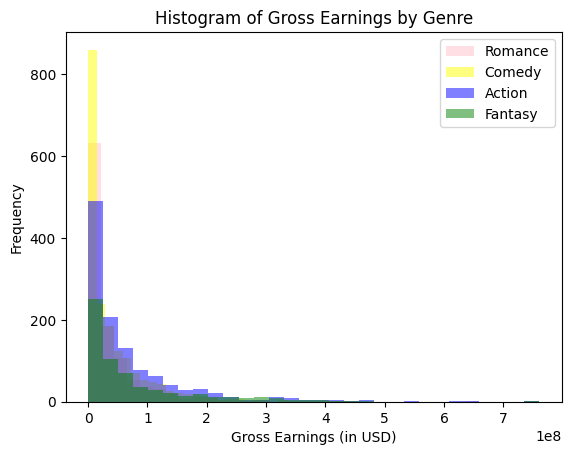

In [81]:
# Filter data by the specific genres
romance = data[data['genres'].str.contains('Romance', na=False)]
comedy = data[data['genres'].str.contains('Comedy', na=False)]
action = data[data['genres'].str.contains('Action', na=False)]
fantasy = data[data['genres'].str.contains('Fantasy', na=False)]

# Romance
plt.hist(romance['gross'].dropna(), bins=30, alpha=0.5, label='Romance', color='pink')

# Comedy
plt.hist(comedy['gross'].dropna(), bins=30, alpha=0.5, label='Comedy', color='yellow')

# Action
plt.hist(action['gross'].dropna(), bins=30, alpha=0.5, label='Action', color='blue')

# Fantasy
plt.hist(fantasy['gross'].dropna(), bins=30, alpha=0.5, label='Fantasy', color='green')

plt.xlabel('Gross Earnings (in USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Gross Earnings by Genre')
plt.legend()
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

## Copying the whole dataframe

In [8]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)